STEPWISE METHODS
-------------------------------

### Forward selection method 

Le principe de la sélection "forward" est d’ajouter, à chaque itération, le facteur qui
maximise le critère. L’ensemble $S^*$ est initialisé avec l’ensemble minimal $S_0$ . A chaque étape de l’algorithme,
l’ensemble $S^*$ est mis à jour par insertion d’une nouvelle variable i. A la fin de l’algorithme, l’ensemble $S^*$
contient les variables qui font partie de la sélection

In [ ]:
#/* Build a linear model using stepwise regression with "forward" search method */
LinearModelResult LinearModelStepwiseFactory::buildForward(const Indices & minimalIndices,
                                                           const NumericalScalar k,
                                                           const UnsignedInteger itermax)
{
  return build(minimalIndices, minimalIndices, true, false, k, itermax);
}

0 : $\text{Entrées : } S_{max}$ , $S_0$ 

1 : $\text{Sortie : }S^∗$

2 : $\text{Initialisation : } S^∗ = S_0 , n_{iter} = 0$

3 : $\text{On estime } Crit^∗ = Crit S_∗$

4 : $\text{Tant que } n_{iter} < M \quad\text{faire} :$

5: $\quad \quad\text{On calcule} :\quad  i = \arg \displaystyle\max_{j \in  S_{max} \backslash S^*} Ctrit_{S^* \,\cup \, j} $

6: $ \quad \quad\text{On estime}\quad  Crit_i = Crit_{S^∗ \,\cup \,  i}$

7: $\quad \quad\text{Si}\quad Crit_i > Crit^∗ \quad \text{Faire} :$

8: $\quad \quad \quad \quad Crit^∗ = Crit_i$

9: $\quad \quad \quad \quad S^∗ =S^∗ \,\cup \,  i$

10 : $\quad \quad\text{Sinon Faire :}$

11 : $\quad \quad \quad \quad \text{Quitter}$

12 :  $\quad \quad\text{Fin Si}$

13 : $\quad \quad n_{iter} = n_{iter} + 1$

14 : $\text{Fin Tant que}$ 

### Backward selection method 

Le principe de la sélection “backward” est d’enlever à chaque itération un facteur
pour augmenter un des critères précédents. Le facteur retiré est celui qui maximise cette augmentation.

In [ ]:
#/* Build a linear model using stepwise regression with "backward" search method */
LinearModelResult LinearModelStepwiseFactory::buildBackward(const Indices & minimalIndices,
                                                            const NumericalScalar k,
                                                            const UnsignedInteger itermax)
{
  Indices startIndices(monomials_.getSize());
  startIndices.fill();
  return build(minimalIndices, startIndices, false, true, k, itermax);
}

### Both selection method 

Le principe de la sélection “both” est d’enlever ou de rajouter un facteur à chaque itération.

In [ ]:
#/* Build a linear model using stepwise regression with "both" search method */
LinearModelResult LinearModelStepwiseFactory::buildBoth(const Indices & minimalIndices,
                                                        const Indices & startIndices,
                                                        const NumericalScalar k,
                                                        const UnsignedInteger itermax)
{
  return build(minimalIndices, startIndices, true, true, k, itermax);
}


### Build method 

In [ ]:
#/* Build a linear model using stepwise regression */
LinearModelResult LinearModelStepwiseFactory::build(const Indices & minimalIndices,
                                                    const Indices & startIndices,
                                                    const Bool forward,
                                                    const Bool backward,
                                                    const NumericalScalar k,
                                                    const UnsignedInteger itermax)
{
  #/* k : the multiple of the degrees of freedom used for the penality
  #      - k=2      Akaike   information criterion (AIC)
  #      - k=log(n) Bayesian information criterion (BIC)  */
  throw NotYetImplementedException(HERE);
}

0 : $\text{Entrées : } S_{min}=\color{blue}{\text{minimalIndices }}, 
                       S_{max}=\color{blue}{\text{getIndices() }} , 
                       S_0=\color{blue}{\text{startIndices }}$ 

1 : $\text{Sortie : }S^∗$

2 : $\text{Initialisation : } S^∗ = S_0 , n_{iter} = 0$

3 : ${\bf\text{Tant que } n_{iter} < \color{blue}{itermax} \quad\text{faire} :}$

$ \quad \quad \quad \color{blue}{\text{currentGramInverse_} = (X^T X)^{-1}} $

$ \quad \quad \quad \color{blue}{\text{currentB_} =  (X^T X)^{-1} X^T} $

4 : $\quad \quad \text{On estime } \quad Crit^∗ = Crit_{S^∗}$
$\color{blue}{\hat{=} \underbrace{\log L(\hat{\beta},\hat{\sigma}\mid Y)}_{computeLogLikelihood()} + k \, \# S^∗  }
$

   $\quad\quad\quad$
   $Crit^i = -\infty \quad,\quad Crit^{i'} = -\infty $

5: $\quad\quad$
   ${\bf\text{Si}\quad \color{blue}{forward} \quad \text{Faire} :}$

6: $\quad\quad\quad\quad$
   ${\bf\text{Pour } j \in S_{max} \backslash S^*  \quad \text{Faire} :}$

7 : $\quad \quad \quad \quad \quad \quad \text{On estime }\quad Ctrit_{S^* \,\cup \, j}$
$\color{blue}{\hat{=} \underbrace{\log L(\hat{\beta}_+,\hat{\sigma}_+\mid Y)}_{computeLogLikelihoodForward(j)} + k \, \# (S^∗\,\cup \, j)  }
$

$\quad\quad\quad\quad\quad\quad\quad$
$Crit^i = \max(Crit^i , Crit_{S^∗ \,\cup \,  j})$

8: $\quad\quad$
   ${\bf\text{Si}\quad \color{blue}{backward} \quad \text{Faire} :}$

9: $\quad\quad\quad\quad$
   ${\bf\text{Pour } j \in S^*\backslash S_{min} \quad \text{Faire} :}$

10 : $\quad \quad \quad \quad \quad \quad \text{On estime }\quad Ctrit_{S^* \,\backslash\, j}$
$\color{blue}{\hat{=} \underbrace{\log L(\hat{\beta}_{-j},\hat{\sigma}_{-j}\mid Y)}_{computeLogLikelihoodBackward(j)} + k \, \# (S^∗\,\backslash \, j)  }
$

$\quad\quad\quad\quad\quad\quad\quad$
$Crit^{i'} = \max(Crit^{i'}, Crit_{S^∗ \,\backslash \,  j})$

11: $\quad\quad$
   ${\bf\text{Si}\quad Crit^i > Crit^∗ \quad \text{Faire} :}$


12: $\quad \quad \quad \quad Crit^∗ = Crit_i$

$\quad \quad \quad \quad \quad S^∗ =S^∗ \,\cup \,  i$

13: $\quad\quad$
   ${\bf\text{Si}\quad Crit^{i'} > Crit^∗ \quad \text{Faire} :}$


14: $\quad \quad \quad \quad Crit^∗ = Crit_{i'}$

$\quad \quad \quad \quad \quad S^∗ =S^∗ \,\backslash \,  i'$


15 : $\quad \quad{\bf\text{ Sinon Faire :}}$

16 : $\quad \quad \quad \quad \text{Quitter}$

17 : $\quad \quad n_{iter} = n_{iter} + 1$


In [ ]:
private:

#/** The input data  */
  NumericalSample inputSample_;

#/** The formula description */
  String formula_;

#/** The monomials collection */
  Description monomials_;

#/** The current matrix */
  Matrix currentMatrix_;

#/** The indices of current model */
  Indices currentIndices_;

#/** The function */
  NumericalMathFunction func_;

#/** penalization term */
  NumericalScalar penality_;

#/** The covariance matrix inverse: A=(X^T X)^-1 */
  CovarianceMatrix currentGramInverse_;

#/** The non-square matrix : B= A X^T   */
  Matrix currentB_;

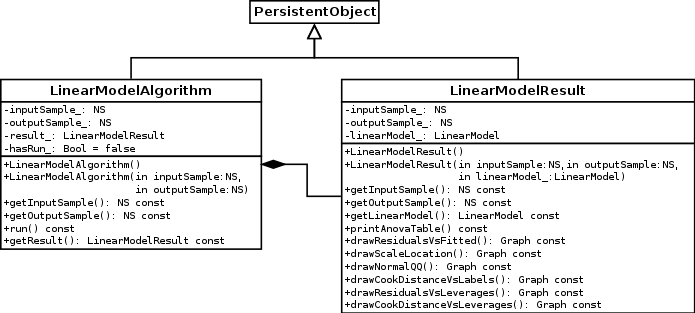

In [2]:
from IPython.display import Image
Image(filename='LinearModelAlgorithm.png')